<a href="https://colab.research.google.com/github/antidude900/pytorch_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(1)
Y = weight * X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:

print(int(len(X)))
train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

50
40 40 10 10


In [ ]:
def plot_prediction(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test,prediction=None):
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="test data")
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="prediction")

  plt.xlabel("Input")
  plt.ylabel("Output")
  plt.legend(prop={"size":14})

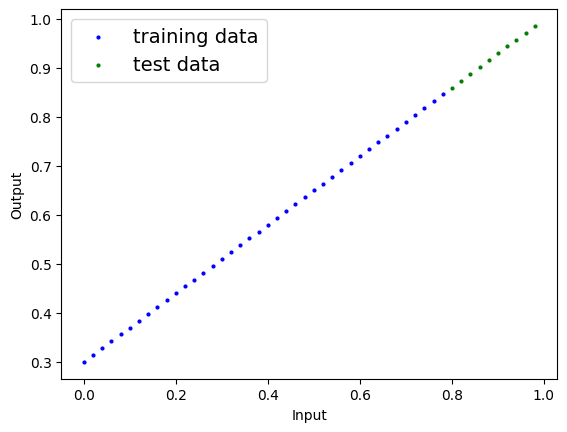

In [ ]:
plot_prediction()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.rand(1))
    self.temp = 0

  def forward(self,x:torch.tensor)->torch.tensor:
    return self.weight*x+self.bias

In [ ]:
torch.manual_seed(42)

model = LinearRegressionModel()
list(model.parameters())
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [ ]:
print(X_test)
print(Y_test)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [ ]:
with torch.inference_mode():
  y_preds=model(X_test)
y_preds



tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

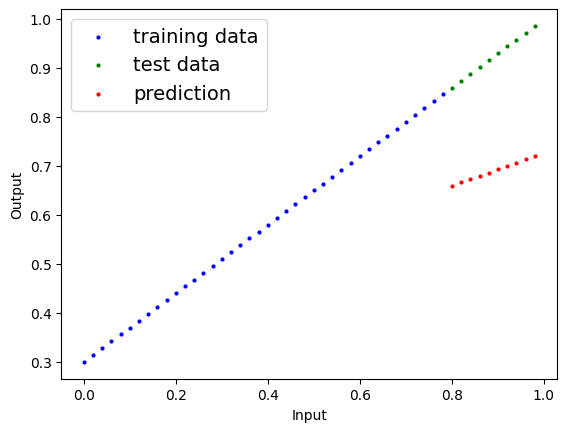

In [ ]:
plot_prediction(prediction=y_preds)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [ ]:
print(X_test.shape,y_preds.shape)

torch.Size([10, 1]) torch.Size([10, 1])


Epoch:0 | Loss:0.08169572055339813 | Test Loss:0.22662055492401123
OrderedDict([('weight', tensor([0.3398])), ('bias', tensor([0.3939]))])


Epoch:100 | Loss:0.034646838903427124 | Test Loss:0.08051808178424835
OrderedDict([('weight', tensor([0.5293])), ('bias', tensor([0.3714]))])


Epoch:200 | Loss:0.004964242689311504 | Test Loss:0.010411137714982033
OrderedDict([('weight', tensor([0.6923])), ('bias', tensor([0.2964]))])


Epoch:300 | Loss:0.004964242689311504 | Test Loss:0.010411137714982033
OrderedDict([('weight', tensor([0.6923])), ('bias', tensor([0.2964]))])


Epoch:400 | Loss:0.004964242689311504 | Test Loss:0.010411137714982033
OrderedDict([('weight', tensor([0.6923])), ('bias', tensor([0.2964]))])


Epoch:500 | Loss:0.004964242689311504 | Test Loss:0.010411137714982033
OrderedDict([('weight', tensor([0.6923])), ('bias', tensor([0.2964]))])


Epoch:600 | Loss:0.004964242689311504 | Test Loss:0.010411137714982033
OrderedDict([('weight', tensor([0.6923])), ('bias', tensor([0.29

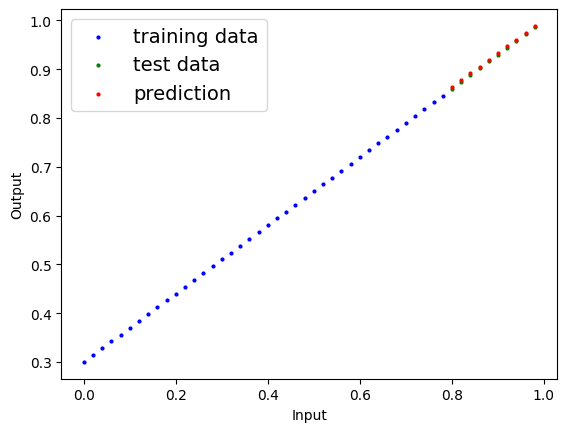

In [ ]:
epchos = 1000

epoch_count = []
loss_count=[]
test_loss_count=[]

for epoch in range(epchos):
  model.train()

  y_preds = model(X_train)

  loss = loss_fn(y_preds,Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()


  with torch.inference_mode():
    y_preds=model(X_test)
    test_loss = loss_fn(y_preds,Y_test)

  if (epoch%100 == 0):
    epoch_count.append(epoch)
    loss_count.append(loss)
    test_loss_count.append(test_loss)

    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")
    print(model.state_dict())
    print("\n")

plot_prediction(prediction=y_preds)



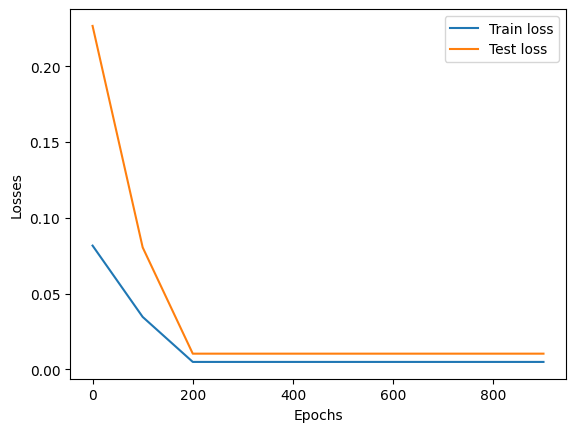

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_count)),label="Train loss")
plt.plot(epoch_count,test_loss_count,label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"SAVING TO: {MODEL_SAVE_PATH}")
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)


SAVING TO: model/01_pytorch_workflow.pth


In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<ipython-input-18-79d546f6fe88>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
print(model.state_dict())
print(loaded_model.state_dict())

OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])
OrderedDict([('weight', tensor([0.6962])), ('bias', tensor([0.3064]))])


In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds == y_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting It all Together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device  = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x):
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model  = LinearRegressionModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01,)

Epoch:0 | Loss:0.5551779866218567 | Test Loss:0.5739762187004089
OrderedDict([('linear_layer.weight', tensor([[0.7606]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))])


Epoch:100 | Loss:0.006215683650225401 | Test Loss:0.014086711220443249
OrderedDict([('linear_layer.weight', tensor([[0.6707]], device='cuda:0')), ('linear_layer.bias', tensor([0.3120], device='cuda:0'))])


Epoch:200 | Loss:0.0012645035749301314 | Test Loss:0.013801801018416882
OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')), ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])


Epoch:300 | Loss:0.0012645035749301314 | Test Loss:0.013801801018416882
OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')), ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])


Epoch:400 | Loss:0.0012645035749301314 | Test Loss:0.013801801018416882
OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')), ('linear_layer.bias', tensor(

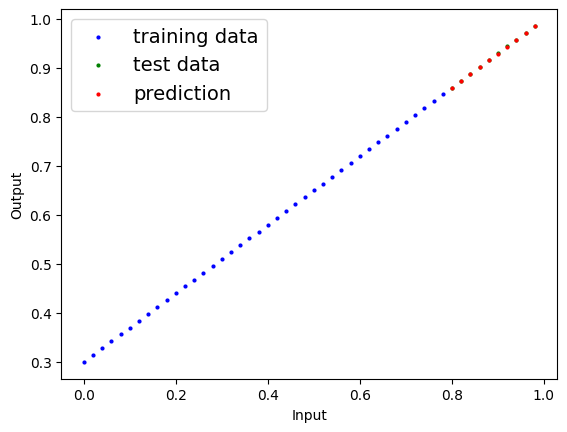

In [ ]:
torch.manual_seed(42)
epchos = 1000

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)


epoch_count = []
loss_count=[]
test_loss_count=[]

for epoch in range(epchos):
  model.train()

  y_preds = model(X_train)

  loss = loss_fn(y_preds,Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()


  with torch.inference_mode():
    y_preds=model(X_test)
    test_loss = loss_fn(y_preds,Y_test)

  if (epoch%100 == 0):
    epoch_count.append(epoch)
    loss_count.append(loss)
    test_loss_count.append(test_loss)

    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")
    print(model.state_dict())
    print("\n")

plot_prediction(prediction=y_preds.cpu())



In [ ]:
from pathlib import Path

MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"SAVING TO: {MODEL_SAVE_PATH}")
torch.save(obj = model.state_dict(),f = MODEL_SAVE_PATH)


SAVING TO: model/01_pytorch_workflow.pth


In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

loaded_model.to(device)

<ipython-input-35-9a17164f3c39>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))


LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')